# 機器學習流程
# 1.讀取資料
# 2.數據清洗
# 3.特徵工程
# 4.相關性分析
# 5.訓練模型

# 1.讀取資料

In [ ]:
# 環境準備，使用 Python NumPy、Pandas
import pandas as pd
import numpy as np

In [ ]:
# train資料來源
df_train_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DisasterTweets_ANN/main/nlp-getting-started/train.csv'

df_train = pd.read_csv(df_train_url)

df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# 2.數據清洗

In [ ]:
# 查看文本36，現在有@PhDSquares
df_train['text'][36]

"@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."

In [ ]:
import re


# 寫清洗函數
def clean_text(rawText):
    # 用re.sub()來做單字替換

    # 用正則式抓取特定文字
    # https? = 適配https or http (?為前一個字可有可無)
    # \/ = /
    # .* = 任何字串
    rawText[:] = [re.sub(r'https?:\/\/.*', 'URL', text) for text in rawText] # 把所有的網址轉換為URL這個單字

    # @\w+ = 用\w抓取@後面的所有字(用+代表抓取後面多個字元)
    # [-.]\w = 抓取-和.後面的字(可以防止@後面有-或是.，造成抓取不完全的問題)
    # ()* = 匹配多個括號內的狀況(可以匹配多個被-和.分隔開的狀況)
    rawText[:] = [re.sub(r'@\w+([-.]\w+)*', '', text) for text in rawText] # 把@後面的字轉換為空白
    rawText[:] = [re.sub(r'&\w+([-.]\w+)*', '', text) for text in rawText] # 把&後面的字轉換為空白

    # 回傳整理好的rawText
    return rawText[:]

# 呼叫清洗函數工作
# 把htttp轉化為了URL統一標識，且去掉了@和&這兩個相對於#來說沒有價值的噪音
# 用.copy()先拷貝出一份df_train['text']再丟入清洗函數中，防止發生鍊式賦值的情況，導致賦值失敗
df_train['text'] = clean_text(df_train['text'].copy())

In [ ]:
# 查看文本36，現在@PhDSquares已經被替換成空白
df_train['text'][36]

" #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season."

# 3.特徵工程

In [ ]:
from sklearn import feature_extraction,model_selection,preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer是屬於常見的特徵數值計算類，是一種文字特徵提取方法。對於每一個訓練文本，它只考慮每個詞彙在該訓練文本中出現的頻率
# CountVectorizer會將文字中的字詞轉換為詞頻陣列，它透過fit_transform函數計算各個字詞出現的次數，以便用於機器學習演算法
count_vectorizer = CountVectorizer()      # 創建轉換器

# 用count_vectorizer的fit_transform把前五行文本中的內容總共有54個單詞，轉換成了54個字的表示形式，0代表這個詞語沒有出現，1代表這個詞語有出現
# 轉換出來的值為稀疏矩陣
example_train_vectors = count_vectorizer.fit_transform(df_train["text"][0:5]) # 先用前5個文本，看看會轉換多紹特徵


# .toarray()方法的作用是將稀疏矩陣轉換為常規的NumPy數組（即密集矩陣）。
# 這個運算會建立一個包含所有零值的完整矩陣，使得矩陣不再是稀疏的。
# 稀疏矩陣是用於儲存大多數元素為零的矩陣的資料結構，它只記錄非零元素的位置和值，從而節省記憶體和計算資源。
print(example_train_vectors[0].toarray().shape) # 印出示範的維度
print(example_train_vectors[0].toarray())    # 印出示範向量具體內容

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [ ]:
# 正式進行訓練集文字的轉換
train_vectors = count_vectorizer.fit_transform(df_train["text"])


print(train_vectors[0].toarray().shape) # 印出訓練集的維度
print(train_vectors[0].toarray())    # 印出訓練集向量具體內容

# 可以看出特徵是非常的多

(1, 14314)
[[0 0 0 ... 0 0 0]]


# 4.相關性分析

In [ ]:
# 大量的特徵要做相關性分析然後再人工篩選特徵實在太費工，等等直接交給神經網路去做篩選

# 5.訓練模型

In [ ]:
# 設定特徵
X_train = train_vectors.toarray()

# 查看特徵的形狀
X_train.shape

(7613, 14314)

In [ ]:
# 設定標籤
y_train = df_train['target']

# 查看標籤的形狀
y_train.shape

(7613,)

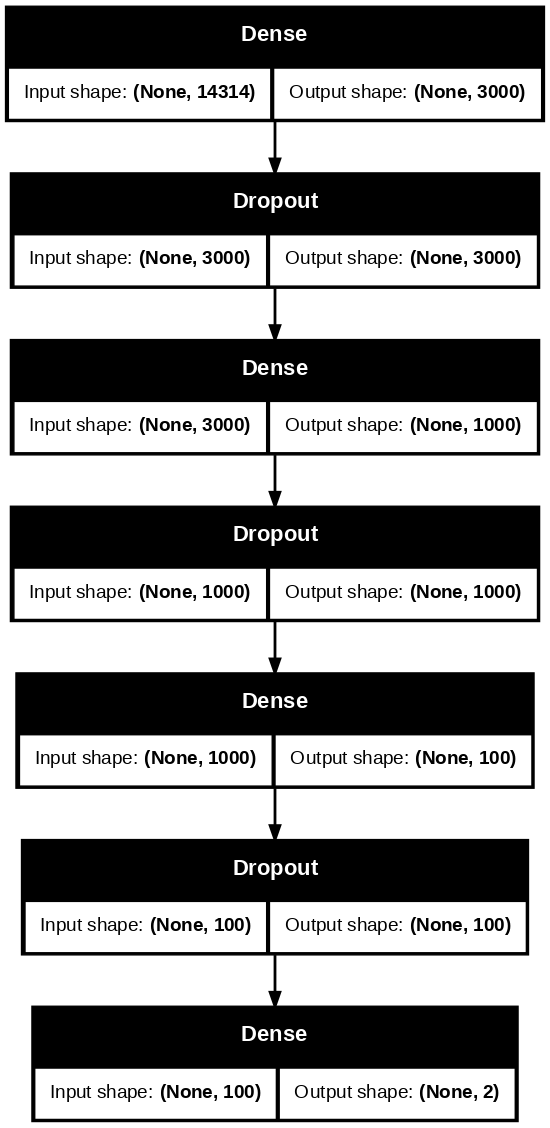

In [ ]:
import keras
from keras import layers


# 用Sequential建立模型
ANN = keras.Sequential()

# 傳入14314個特徵
ANN.add(layers.Input(shape=(14314,)))

# input為14314個特徵，output為3000個神經元。
# 用relu來收斂
ANN.add(layers.Dense(3000, activation='relu'))

# 在訓練週期隨機丟棄20%的神經元，藉以矯正過度擬合的現象。
# Dropout 是一種對抗過擬合的正則化方法，以一定的機率丟棄隱藏層神經元來對抗過擬合
ANN.add(layers.Dropout(0.2))

# input為3000個特徵，output為1000個神經元。
# 用relu來收斂
ANN.add(layers.Dense(1000, activation='relu'))

# 在訓練週期隨機丟棄20%的神經元，藉以矯正過度擬合的現象。
# Dropout 是一種對抗過擬合的正則化方法，以一定的機率丟棄隱藏層神經元來對抗過擬合
ANN.add(layers.Dropout(0.2))

# input為1000個特徵，output為100個神經元。
# 用relu來收斂
ANN.add(layers.Dense(100, activation='relu'))

# 在訓練週期隨機丟棄20%的神經元，藉以矯正過度擬合的現象。
# Dropout 是一種對抗過擬合的正則化方法，以一定的機率丟棄隱藏層神經元來對抗過擬合
ANN.add(layers.Dropout(0.2))

# 輸出2個神經元，透過 softmax activation function，轉成機率，即0~1的預測機率，選擇最大機率者為預測值。
ANN.add(layers.Dense(2, activation='softmax'))

# 顯示模型圖
keras.utils.plot_model(ANN,show_shapes=True,dpi=100) # show_shapes:是否顯示形狀資訊 dpi:圖示大小


# # 打印出模型的信息
# ANN.summary()

In [ ]:
# model每層定義好後需要經過compile
# optimizer(最佳化工具)為adam
# loss(損失函數)為sparse_categorical_crossentropy
# Metrics(評估標準)為accuracy
ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# 訓練網絡用fit
# X_train去跟y_train比，全部資料跑五次
# verbose：日誌顯示，0為不在標準輸出流輸出日誌訊息，1為輸出進度條記錄，2為每個epoch輸出一行記錄
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例資料作為驗證集。
# 請注意:
# 模型的fit函數有兩個參數，shuffle用於將資料打亂，validation_split用於在沒有提供驗證集的時候，以一定比例從訓練集中取出一部分作為驗證集
# 這裡有個陷阱是，程式是先執行validation_split，再執行shuffle的，所以會出現這種情況：
# 假如你的訓練集是有序的，比方說正樣本在前負樣本在後，又設定了validation_split，那麼你的驗證集中很可能將全部是負樣本
# 同樣的，這個東西不會有任何錯誤報出來，因為Keras不可能知道你的數據有沒有經過shuffle，保險起見如果你的數據是沒shuffle過的，最好手動shuffle一下
history = ANN.fit(X_train, y_train,validation_split=0.25,epochs=5)

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7071 - loss: 0.5625 - val_accuracy: 0.7826 - val_loss: 0.4852
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9158 - loss: 0.2308 - val_accuracy: 0.7574 - val_loss: 0.5199
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9586 - loss: 0.1166 - val_accuracy: 0.7321 - val_loss: 0.7782
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9586 - loss: 0.0861 - val_accuracy: 0.7211 - val_loss: 0.9504
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9735 - loss: 0.0608 - val_accuracy: 0.7353 - val_loss: 1.1846


In [ ]:
# History.history 屬性是一個記錄了連續迭代的訓練/驗證（如果存在）損失值和評估值的字典
history.history

{'accuracy': [0.7647573947906494,
  0.9131196141242981,
  0.9546330571174622,
  0.9628656506538391,
  0.9714486002922058],
 'loss': [0.5148138999938965,
  0.24109776318073273,
  0.1225648894906044,
  0.0856466293334961,
  0.06699538230895996],
 'val_accuracy': [0.7825630307197571,
  0.7573529481887817,
  0.7321428656578064,
  0.7211134433746338,
  0.7352941036224365],
 'val_loss': [0.4852079153060913,
  0.5199156403541565,
  0.7781657576560974,
  0.9503628015518188,
  1.1845695972442627]}

In [ ]:
# evaluate() 用於評估已經過訓練的模型。返回模型的損失值&準確率值
# 損失函數即實際值和預測值的殘差所以越小越好
# 使用 return_dict=True 參數，傳回的結果將是一個字典，其中鍵是名稱，值是對應的數值
# 使用 return_dict=False（預設情況），則傳回一個標量或標量清單(沒有名稱)
ann_evaluate = ANN.evaluate(X_train, y_train, return_dict=True, verbose=2) # verbose = 2 為每個epoch輸出一行記錄

print("Accuracy:", ann_evaluate["accuracy"])
print("Loss:", ann_evaluate["loss"])

238/238 - 1s - 6ms/step - accuracy: 0.9128 - loss: 0.3351
Accuracy: 0.91278076171875
Loss: 0.33506670594215393


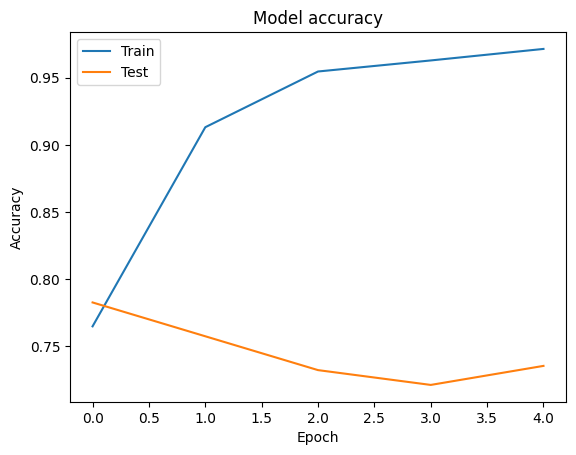

In [ ]:
# 繪製訓練 & 驗證的準確率值
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

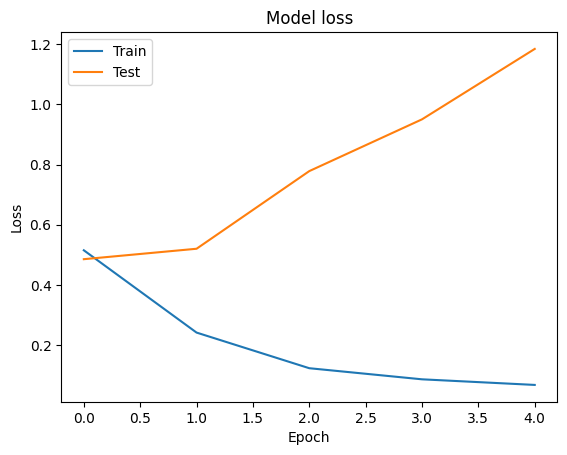

In [ ]:
# 繪製訓練 & 驗證的損失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# 1.讀取資料

In [ ]:
# test資料來源
df_test_url = 'https://raw.githubusercontent.com/micrighost/KaggleNotes_DisasterTweets_ANN/main/nlp-getting-started/test.csv'

df_test = pd.read_csv(df_test_url)

df_test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


# 2.數據清洗

In [ ]:
# 呼叫清洗函數就地工作
# 把htttp轉化為了URL統一標識，且去掉了@和&這兩個相對於#來說沒有價值的噪音
# 用.copy()先拷貝出一份df_test['text']再丟入清洗函數中，防止發生鍊式賦值的情況，導致賦值失敗
df_test['text'] = clean_text(df_test['text'].copy())

# 3.特徵工程

In [ ]:
# 進行測試集文字的轉換
# 因為我們假設訓練集和測試集分佈相同，所以測試集上只用了transform而不是fit_transform
test_vectors = count_vectorizer.transform(df_test["text"])


print(test_vectors[0].toarray().shape) # 印出測試集的維度
print(test_vectors[0].toarray())    # 印出測試集向量具體內容

(1, 14314)
[[0 0 0 ... 0 0 0]]


# 4.相關性分析

In [ ]:
# 大量的特徵要做相關性分析然後再人工篩選特徵實在太費工，等等直接交給神經網路去做篩選

# 5.訓練模型

In [ ]:
# 設定特徵
X_test = test_vectors.toarray()

# 查看特徵的形狀
X_test.shape

(3263, 14314)

In [ ]:
# 進行預測

predict = ANN.predict(X_test)

# 抓到X_test的第[]的比對結果，並把結果印出至小數點第3位
print(np.round(predict[0],3))

# 用shape顯示矩陣形狀,可以看到預測結果為3263組答案，裡面包含各分類的可能性
predict.shape

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[0.908 0.092]


(3263, 2)

In [ ]:
# 用np.argmax把[]中的最適結果印出來
predict = np.argmax(predict,axis=1)

print('prelabel:',predict[0])

prelabel: 0


In [ ]:
# 導出預測結果
test_ann_predict = pd.DataFrame()
test_ann_predict['id'] = df_test['id']
test_ann_predict['target'] = predict

# 顯示預測結果
test_ann_predict

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
# 將預測結果導出為csv文件
test_ann_predict.to_csv('./DisasterTweets_ANN.csv',index=False)